# Plots for dim = 2

In [126]:
import pickle
save_pathname_dim2 = "results/ICNN_5_seed_1009_samples_5000_dim_2/evaluated_samples"
V_value_dirc_dim2 = f"{save_pathname_dim2}/V_values"
W2_to_true_dirc_dim2 = f"{save_pathname_dim2}/W2_to_true_bary"



In [103]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the JSON files
with open(f"{V_value_dirc_dim2}/V_values.json", "r") as file1:
    v_data_dim2 = json.load(file1)

with open(f"{W2_to_true_dirc_dim2}/W2_to_true_bary.json", "r") as file2:
    w2_data_dim2 = json.load(file2)

In [104]:
len(v_data_dim2)

20

In [113]:
with open(f"{save_pathname_dim2}/true_V_values_dim2.pkl", "rb") as f:
    true_v_value_record_dim2 = pickle.load(f)
# Calculate statistics for true_V_values
mean_true_V_dim2 = np.mean(true_v_value_record_dim2)
lb_dim2, ub_dim2 = np.quantile(true_v_value_record_dim2, [0.05, 0.95])
print(f"True V value: {mean_true_V_dim2} [{lb_dim2}, {ub_dim2}]")

True V value: 5411.624586054706 [5299.090330435885, 5507.67100744824]


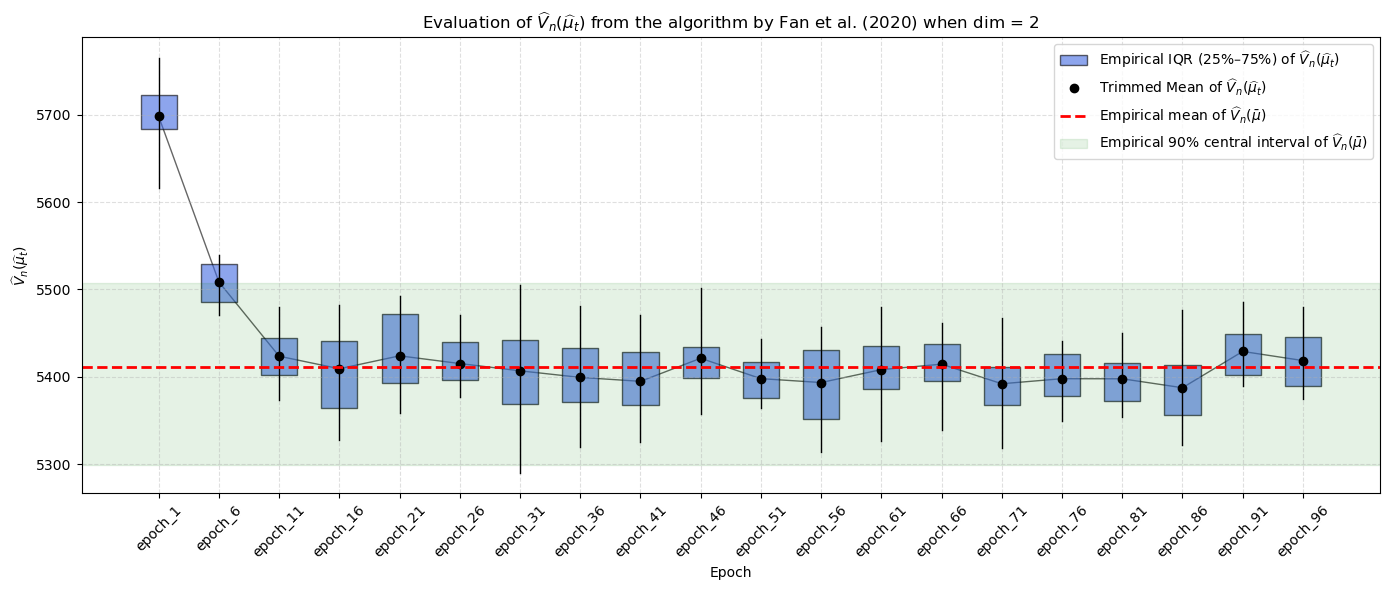

In [130]:
trim_pct = 0.1
sorted_epochs = sorted(v_data_dim2.keys(), key=lambda x: int(x.split("_")[1]))

plt.figure(figsize=(14, 6))
trimmed_means = []

for i, epoch in enumerate(sorted_epochs):
    values = np.array(list(v_data_dim2[epoch].values()))
    n = len(values)
    k = int(n * trim_pct)
    sorted_vals = np.sort(values)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([i, i], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else None

    plt.fill_between([i - box_width/2, i + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(i, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else "")
    trimmed_means.append(trimmed_mean)

plt.plot(range(len(sorted_epochs)), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
# Style
# Plot horizontal reference line for mean_true_V
plt.axhline(mean_true_V_dim2, color='red', linestyle='--', linewidth=2, label=r'Empirical mean of $\widehat{V}_n(\bar{\mu})$')

# Add shaded confidence band between lb and ub
# plt.ylim(5000, 8500)
plt.axhspan(lb_dim2, ub_dim2, color='green', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(len(sorted_epochs)), labels=sorted_epochs, rotation=45)
plt.xlabel("Epoch")
plt.ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$")
plt.title(r"Evaluation of $\widehat{V}_n(\widehat{\mu}_t)$ from the algorithm by Fan et al. (2020) when dim = 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{save_pathname_dim2}/V_values_convergence_micro.png")
plt.show()


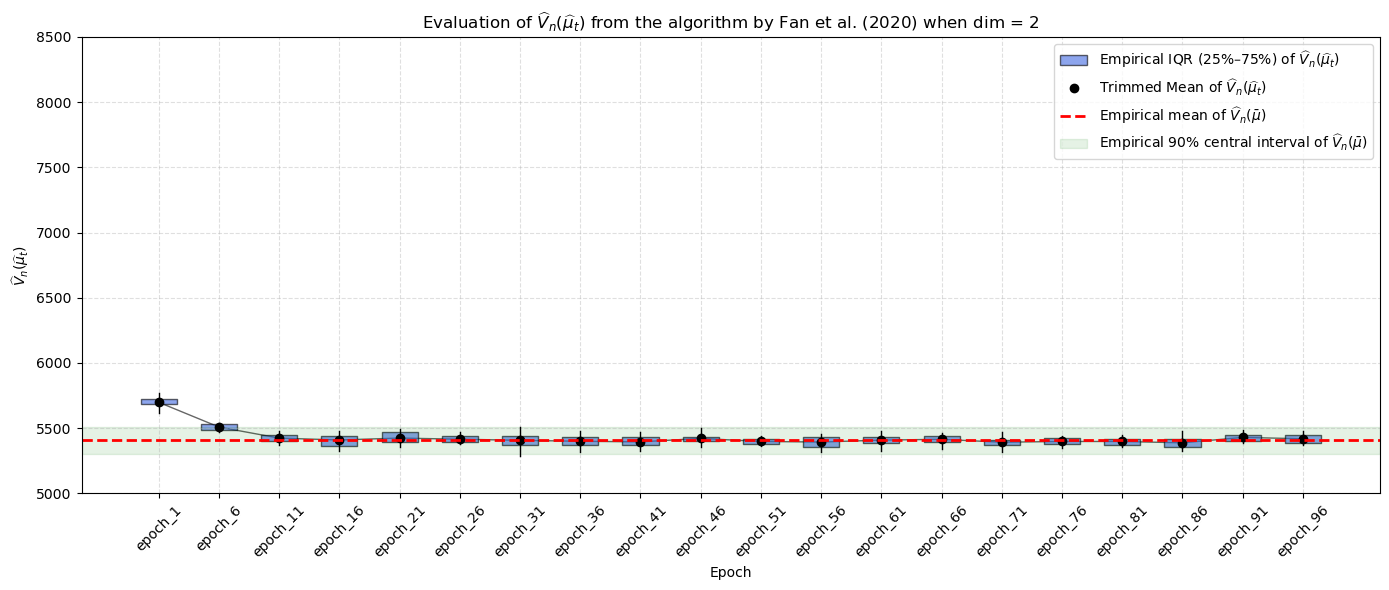

In [131]:
trim_pct = 0.1
sorted_epochs = sorted(v_data_dim2.keys(), key=lambda x: int(x.split("_")[1]))

plt.figure(figsize=(14, 6))
trimmed_means = []

for i, epoch in enumerate(sorted_epochs):
    values = np.array(list(v_data_dim2[epoch].values()))
    n = len(values)
    k = int(n * trim_pct)
    sorted_vals = np.sort(values)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([i, i], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else None

    plt.fill_between([i - box_width/2, i + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(i, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else "")
    trimmed_means.append(trimmed_mean)

plt.plot(range(len(sorted_epochs)), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
# Style
# Plot horizontal reference line for mean_true_V
plt.axhline(mean_true_V_dim2, color='red', linestyle='--', linewidth=2, label=r'Empirical mean of $\widehat{V}_n(\bar{\mu})$')

# Add shaded confidence band between lb and ub
plt.ylim(5000, 8500)
plt.axhspan(lb_dim2, ub_dim2, color='green', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(len(sorted_epochs)), labels=sorted_epochs, rotation=45)
plt.xlabel("Epoch")
plt.ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$")
plt.title(r"Evaluation of $\widehat{V}_n(\widehat{\mu}_t)$ from the algorithm by Fan et al. (2020) when dim = 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{save_pathname_dim2}/V_values_convergence.png")
plt.show()


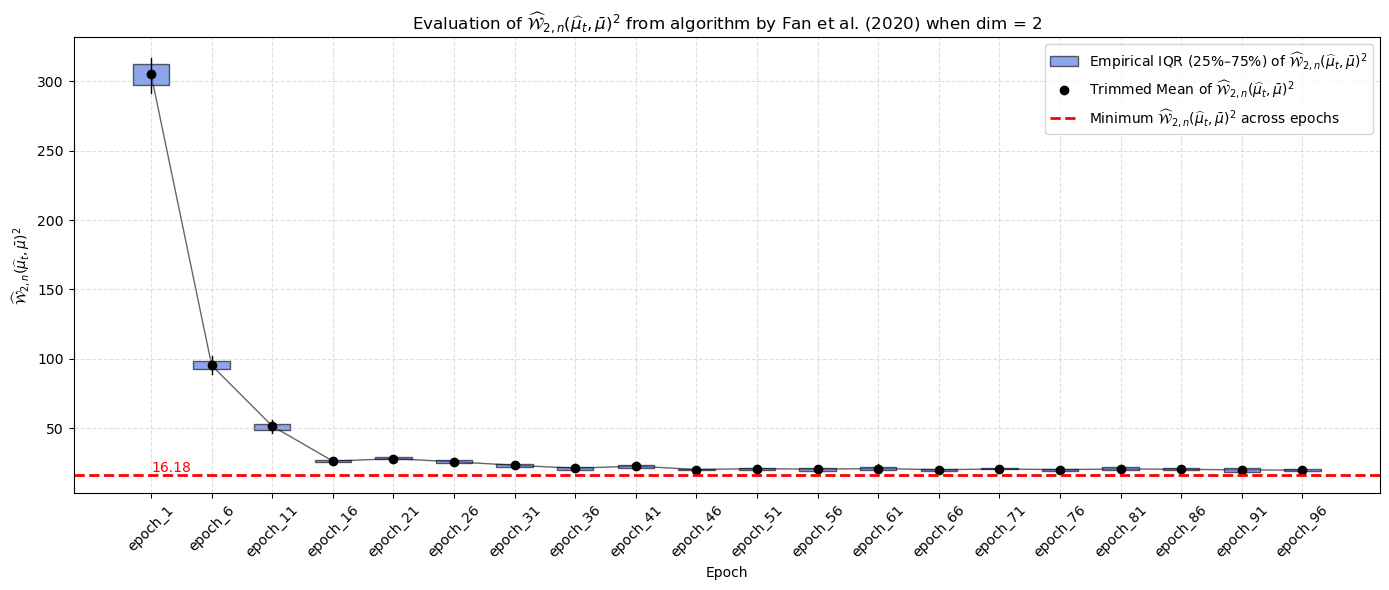

In [116]:
trim_pct = 0.1
sorted_epochs = sorted(w2_data_dim2.keys(), key=lambda x: int(x.split("_")[1]))

plt.figure(figsize=(14, 6))
trimmed_means = []
# Flatten all values from all epochs into one array
all_values = np.concatenate([list(w2_data_dim2[epoch].values()) for epoch in sorted_epochs])
min_achieved = np.min(all_values)


for i, epoch in enumerate(sorted_epochs):
    values = np.array(list(w2_data_dim2[epoch].values()))
    n = len(values)
    k = int(n * trim_pct)
    sorted_vals = np.sort(values)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([i, i], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$' if i == 0 else None

    plt.fill_between([i - box_width/2, i + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(i, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$' if i == 0 else "")
    trimmed_means.append(trimmed_mean)

plt.plot(range(len(sorted_epochs)), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
plt.axhline(min_achieved, color='red', linestyle='--', linewidth=2,
            label=r'Minimum $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$ across epochs')
# Add a label (adjust x-position if needed)
plt.text(0, min_achieved,
         f"{min_achieved:.2f}",  # format to 2 decimals
         color='red', fontsize=10, va='bottom')

# Style
# Plot horizontal reference line for mean_true_V
# plt.axhline(mean_true_V, color='red', linestyle='--', linewidth=2, label=r'Empirical mean of $\widehat{V}_n(\bar{\mu})$')

# # Add shaded confidence band between lb and ub
# plt.axhspan(lb, ub, color='mediumseagreen', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(len(sorted_epochs)), labels=sorted_epochs, rotation=45)
plt.xlabel("Epoch")
plt.ylabel(r"$\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$")
plt.title(r"Evaluation of $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$ from algorithm by Fan et al. (2020) when dim = 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{save_pathname_dim2}/W2_to_bary_convergence.png")
plt.show()


In [132]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
def get_kde_data(samples, bins=1000):
    x = samples[:, 0]
    y = samples[:, 1]
    # Perform KDE
    kde = gaussian_kde([x, y])
    # Generate a grid
    t = (samples[:, 0].max() - samples[:, 0].min()) / 3
    x_min, x_max = x.min() - t, x.max() + t
    y_min, y_max = y.min() - t, y.max() + t
    x_grid = np.linspace(x_min, x_max, bins)
    y_grid = np.linspace(y_min, y_max, bins)
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
    # Evaluate KDE on the grid
    kde_values = kde(np.vstack([x_mesh.ravel(), y_mesh.ravel()])).reshape(x_mesh.shape)
    return x_mesh, y_mesh, kde_values

def plot_2d_source_measures_kde(samples, scatter = False, plot_dirc = None):
    # dimension of the samples
    dim = samples.shape[1]
    if dim > 2:
        # Perform PCA to reduce dimensions to 2D
        pca = PCA(n_components=2)
        samples = pca.fit_transform(samples)
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
    # Use a black background
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    # Set axis limits to include all samples and contours

    t = (samples[:, 0].max() - samples[:, 0].min()) / 2
    ax.set_xlim(samples[:, 0].min() - t, samples[:, 0].max() + t)
    ax.set_ylim(samples[:, 1].min() - t, samples[:, 1].max() + t)
    # Get KDE data
    x_mesh, y_mesh, kde_values = get_kde_data(samples)
    # Plot KDE as a contour plot
    h = ax.contourf(x_mesh, y_mesh, kde_values, levels=200, cmap='hot')
    # Overlay scatter plot if requested
    if scatter:
        ax.scatter(samples[:, 0], samples[:, 1], s=5, color='green', alpha=0.5)

    # Set title and labels
    ax.set_title('Samples', color='white')
    ax.set_xlabel('X1', color='white')
    ax.set_ylabel('X2', color='white')

    # Adjust axis colors for visibility on black background
    ax.tick_params(colors='white')
    # Add a colorbar
    cbar = fig.colorbar(h, ax=ax)
    cbar.ax.yaxis.set_tick_params(color='white')
    cbar.outline.set_edgecolor('white')
    
    if plot_dirc:
        os.makedirs(plot_dirc, exist_ok=True)
        # Save the figure
        plt.savefig(f"{plot_dirc}/source_measure.png", facecolor='black')
        # Close the plot to free memory
        plt.close()
    else:
        plt.show()

In [135]:
epoch_evaluation_save_path = "results/ICNN_5_seed_1009_samples_5000_dim_2/evaluated_samples"
approximated_bary_samples = pd.read_csv(f"{epoch_evaluation_save_path}/outputs_NWBFanTaghvaeiChen_samples_epoch_{11}.csv", header = None).to_numpy()
plot_2d_source_measures_kde(approximated_bary_samples, plot_dirc = f"{epoch_evaluation_save_path}/approximated_bary_samples_epoch_11")

In [136]:
epoch_evaluation_save_path = "results/ICNN_5_seed_1009_samples_5000_dim_2/evaluated_samples"
approximated_bary_samples = pd.read_csv(f"{epoch_evaluation_save_path}/outputs_NWBFanTaghvaeiChen_samples_epoch_{31}.csv", header = None).to_numpy()
plot_2d_source_measures_kde(approximated_bary_samples, plot_dirc = f"{epoch_evaluation_save_path}/approximated_bary_samples_epoch_31")

In [ ]:
f"{epoch_evaluation_save_path}/approximated_bary_samples_epoch_11"

# Plots for dim = 10

In [117]:
import pickle
save_pathname_dim10 = "results/ICNN_10_seed_1009_samples_5000_dim_10/evaluated_samples"
V_value_dirc_dim10 = f"{save_pathname_dim10}/V_values"
W2_to_true_dirc_dim10 = f"{save_pathname_dim10}/W2_to_true_bary"


In [118]:
# Load the JSON files
with open(f"{V_value_dirc_dim10}/V_values.json", "r") as file1:
    v_data_dim10 = json.load(file1)

with open(f"{W2_to_true_dirc_dim10}/W2_to_true_bary.json", "r") as file2:
    w2_data_dim10 = json.load(file2)

In [119]:
with open(f"{save_pathname_dim10}/true_V_values_dim10.pkl", "rb") as f:
    true_v_value_record_dim10 = pickle.load(f)
# Calculate statistics for true_V_values
mean_true_V_dim10 = np.mean(true_v_value_record_dim10)
lb_dim10, ub_dim10 = np.quantile(true_v_value_record_dim10, [0.05, 0.95])
print(f"True V value: {mean_true_V_dim10} [{lb_dim10}, {ub_dim10}]")

True V value: 8967.693736476866 [8932.524685303866, 9010.39214329197]


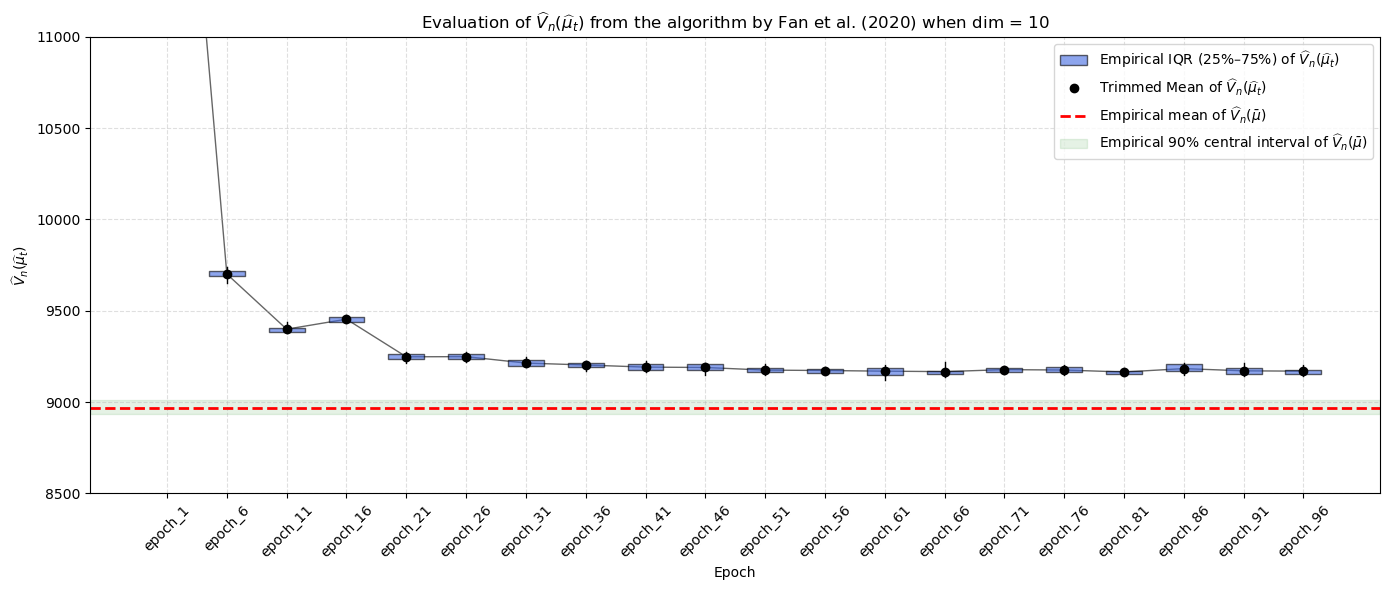

In [120]:
trim_pct = 0.1
sorted_epochs = sorted(v_data_dim10.keys(), key=lambda x: int(x.split("_")[1]))

plt.figure(figsize=(14, 6))
trimmed_means = []

for i, epoch in enumerate(sorted_epochs):
    values = np.array(list(v_data_dim10[epoch].values()))
    n = len(values)
    k = int(n * trim_pct)
    sorted_vals = np.sort(values)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([i, i], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else None

    plt.fill_between([i - box_width/2, i + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(i, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else "")
    trimmed_means.append(trimmed_mean)

# Draw true V value
plt.ylim(bottom = 8500, top=11000)
plt.plot(range(len(sorted_epochs)), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
# Style
# Plot horizontal reference line for mean_true_V
plt.axhline(mean_true_V_dim10, color='red', linestyle='--', linewidth=2, label=r'Empirical mean of $\widehat{V}_n(\bar{\mu})$')

# Add shaded confidence band between lb and ub
plt.axhspan(lb_dim10, ub_dim10, color='green', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(len(sorted_epochs)), labels=sorted_epochs, rotation=45)
plt.xlabel("Epoch")
plt.ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$")
plt.title(r"Evaluation of $\widehat{V}_n(\widehat{\mu}_t)$ from the algorithm by Fan et al. (2020) when dim = 10")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{save_pathname_dim10}/V_values_convergence.png")
plt.show()


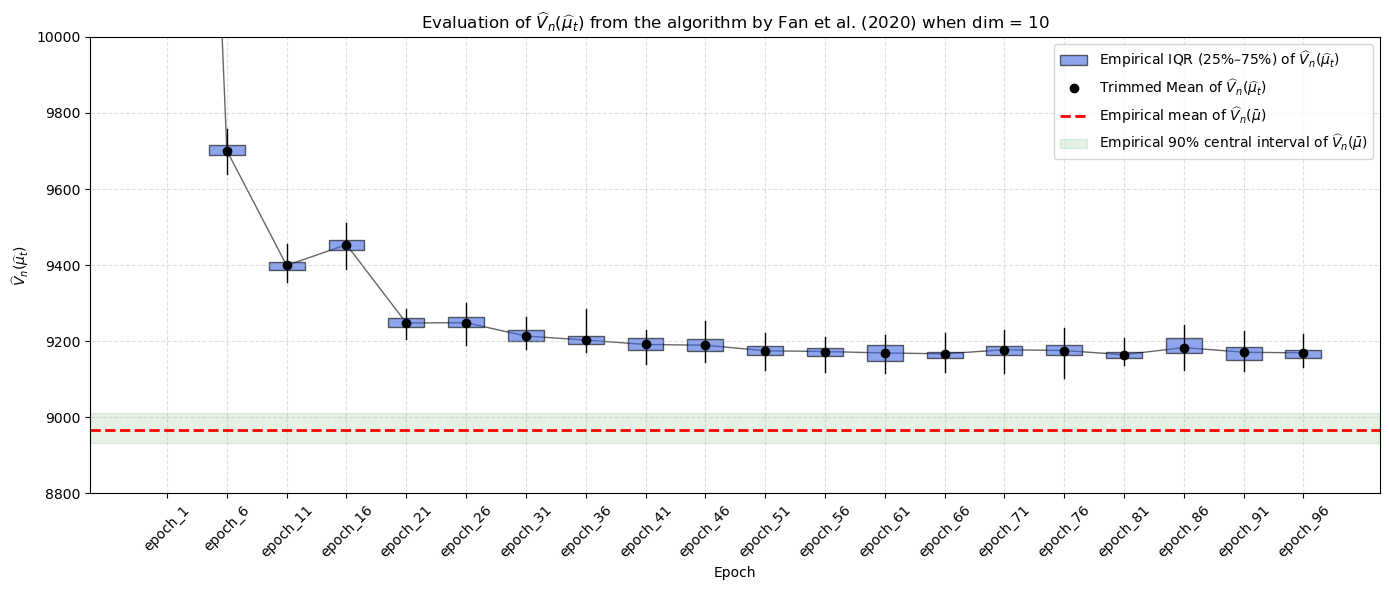

In [ ]:
trim_pct = 0.1
sorted_epochs = sorted(v_data_dim10.keys(), key=lambda x: int(x.split("_")[1]))

plt.figure(figsize=(14, 6))
trimmed_means = []
# all_values = np.concatenate([list(v_data_dim10[epoch].values()) for epoch in sorted_epochs])
# min_achieved = np.min(all_values)
# print(min_achieved)

for i, epoch in enumerate(sorted_epochs):
    values = np.array(list(v_data_dim10[epoch].values()))
    n = len(values)
    k = int(n * trim_pct)
    sorted_vals = np.sort(values)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(values)
    max_val = np.max(values)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([i, i], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else None

    plt.fill_between([i - box_width/2, i + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(i, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{V}_n(\widehat{\mu}_t)$' if i == 0 else "")
    trimmed_means.append(trimmed_mean)


# Draw true V value
plt.ylim(bottom = 8800, top=10000)
plt.plot(range(len(sorted_epochs)), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
# plt.axhline(min_achieved, color='RoyalBlue', linestyle='--', linewidth=2,
#             label=r'Minimum $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$ across epochs')
# Add a label (adjust x-position if needed)
# plt.text(0, min_achieved,
#          f"{min_achieved:.2f}",  # format to 2 decimals
#          color='red', fontsize=10, va='bottom')
# Style
# Plot horizontal reference line for mean_true_V
plt.axhline(mean_true_V_dim10, color='red', linestyle='--', linewidth=2, label=r'Empirical mean of $\widehat{V}_n(\bar{\mu})$')

# Add shaded confidence band between lb and ub
plt.axhspan(lb_dim10, ub_dim10, color='green', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(len(sorted_epochs)), labels=sorted_epochs, rotation=45)
plt.xlabel("Epoch")
plt.ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$")
plt.title(r"Evaluation of $\widehat{V}_n(\widehat{\mu}_t)$ from the algorithm by Fan et al. (2020) when dim = 10")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{save_pathname_dim10}/V_values_convergence_micro.png")
plt.show()


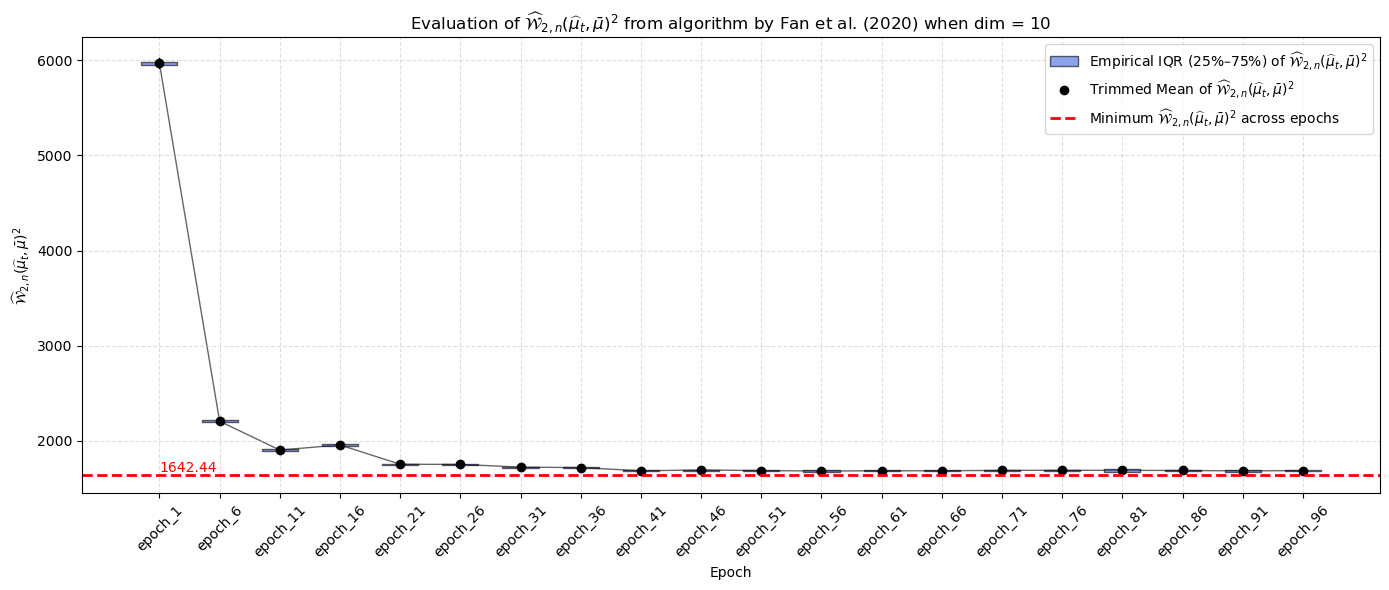

In [100]:
trim_pct = 0.1
sorted_epochs = sorted(w2_data_dim10.keys(), key=lambda x: int(x.split("_")[1]))

plt.figure(figsize=(14, 6))
trimmed_means = []
# Flatten all values from all epochs into one array
all_values = np.concatenate([list(w2_data_dim10[epoch].values()) for epoch in sorted_epochs])
min_achieved = np.min(all_values)

for i, epoch in enumerate(sorted_epochs):
    values = np.array(list(w2_data_dim10[epoch].values()))
    n = len(values)
    k = int(n * trim_pct)
    sorted_vals = np.sort(values)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([i, i], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$' if i == 0 else None

    plt.fill_between([i - box_width/2, i + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(i, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$' if i == 0 else "")
    trimmed_means.append(trimmed_mean)

plt.plot(range(len(sorted_epochs)), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
plt.axhline(min_achieved, color='red', linestyle='--', linewidth=2,
            label=r'Minimum $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$ across epochs')
# Add a label (adjust x-position if needed)
plt.text(0, min_achieved,
         f"{min_achieved:.2f}",  # format to 2 decimals
         color='red', fontsize=10, va='bottom')

# Style
# Plot horizontal reference line for mean_true_V
# plt.axhline(mean_true_V, color='red', linestyle='--', linewidth=2, label=r'Empirical mean of $\widehat{V}_n(\bar{\mu})$')

# # Add shaded confidence band between lb and ub
# plt.axhspan(lb, ub, color='mediumseagreen', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(len(sorted_epochs)), labels=sorted_epochs, rotation=45)
plt.xlabel("Epoch")
plt.ylabel(r"$\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$")
plt.title(r"Evaluation of $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$ from algorithm by Fan et al. (2020) when dim = 10")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig(f"{save_pathname_dim10}/W2_to_bary_convergence.png")
plt.show()
